# Recognizing the spoken digit
#### Credit: [AITS cainvas](http://cainvas.ai-tech.systems/) authors


![](https://cainvas-static.s3.amazonaws.com/media/user_data/cainvas-admin/digit_recognition.gif)


Use mel spectogram images of the audio samples to recognize the spoken digit. The mel scale is a closer representation of the human audio perception than the standard scale.

The same model can be extended to recognize generally spoken words.

In [1]:
import torch
from torch.utils.data import Dataset, random_split, DataLoader, TensorDataset
import torchvision
from torchvision.datasets.utils import download_url
import torch.nn as nn
import torch.nn.functional as F
import os
import librosa
import pandas as pd
import numpy as np
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import librosa.display
import sklearn
import matplotlib
import csv
from PIL import Image
from sklearn.metrics import f1_score
import IPython.display as ipd
import random

The below cell contains the zip file for the dataset and other files required in this notebook.

In [2]:
!wget -N https://cainvas-static.s3.amazonaws.com/media/user_data/cainvas-admin/spoken_digit_melimages.zip
!unzip -qo spoken_digit_melimages.zip

--2020-11-03 10:19:56--  https://cainvas-static.s3.amazonaws.com/media/user_data/cainvas-admin/spoken_digit_melimages.zip
Resolving cainvas-static.s3.amazonaws.com (cainvas-static.s3.amazonaws.com)... 52.219.64.12
Connecting to cainvas-static.s3.amazonaws.com (cainvas-static.s3.amazonaws.com)|52.219.64.12|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 67713679 (65M) [application/zip]
Saving to: ‘spoken_digit_melimages.zip’

spoken_digit_melima 100%[===================>]  64.58M  63.2MB/s    in 1.0s    

2020-11-03 10:19:58 (63.2 MB/s) - ‘spoken_digit_melimages.zip’ saved [67713679/67713679]



## Data

In [3]:
digit = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']

The audio dataset is a subset of the Tensorflow speech commands dataset. 
The subset consisting of digits is too large to be included here.

Each sample is a 1 second long mono audio recorded at 8000 hz.

Here is one sample of each digit.

Label:  7 

Sampling rate:  22050 



/opt/tljh/user/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/opt/tljh/user/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


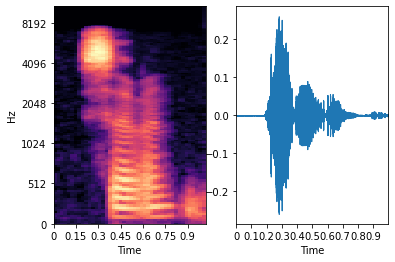

In [4]:
# Random sample selection
digit_audio_sample = ['dataset_sample_0.wav', 'dataset_sample_1.wav', 'dataset_sample_2.wav', 'dataset_sample_3.wav', 'dataset_sample_4.wav', 'dataset_sample_5.wav', 'dataset_sample_6.wav', 'dataset_sample_7.wav', 'dataset_sample_8.wav', 'dataset_sample_9.wav']
i = random.randint(0, 9)

# Selecting the sample by label
#i = 4    # Label = 4

data, sr = librosa.load('melimages/'+digit_audio_sample[i])

fig = plt.figure()
# Two subplots
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

print("Label: ", i, '\n')
print("Sampling rate: ", sr, "\n")

# mel spectogram
S = librosa.feature.melspectrogram(y=data, sr=sr)
librosa.display.specshow(librosa.power_to_db(S, ref=np.max), x_axis='time', y_axis='mel', ax = ax1)
# waveplot
librosa.display.waveplot(np.array(data), sr=sr, ax = ax2)

ipd.Audio(data = data, rate = sr)

## Extracting data 

**No need to execute the following commented code, extracted files included in dataset.**

Execution of the data extraction cells below requires the tensorflow speech commands dataset to be downloaded (~1GB).

Link to download the audio dataset : http://download.tensorflow.org/data/speech_commands_v0.01.tar.gz

#### Creating the reference csv file.

In [ ]:
'''

# Creating a reference csv file

with open("Spoken_digit.csv", 'w') as csvfile:
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow(["File", "Label"])
    for x in digit:
        if os.path.isdir('/content/data/'+x):
            for name in os.listdir('/content/data/'+x):
                if os.path.isfile('/content/data/'+x+"/"+name):
                    csvwriter.writerow([x+'/'+name, x])

# shuffle 
df = pd.read_csv('Spoken_digit.csv')
df = df.sample(frac=1)
df.to_csv('Spoken_digit.csv', index = False)

'''

#### Extracting the mel spectogram images from the audio samples.

In [ ]:
'''

# -- Extraction can take about 8 hours

# Making folders to store the extracted images

path = ''
os.makedirs(path+'/melimages')
for i in digit:
    os.makedirs(path+'/melimages/'+i)
    os.makedirs(path+'/melimages100/'+i)
    os.makedirs(path+'/melimages200/'+i)

for i in range(0, len(sp)):
    print(i)    # Print to keep track of which file is being processed

    f = sp.loc[i]
    
    name = f.File
    data, sr = librosa.load('/content/data/'+name)
    
    fig = plt.figure(figsize=[1,1])
    ax = fig.add_subplot(111)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.set_frame_on(False)
    
    S = librosa.feature.melspectrogram(y=data, sr=sr)
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max), x_axis='time', y_axis='mel')
    
    file  = path+'/melimages/'+str(name[:-4]) + '.jpg'
    plt.savefig(file, bbox_inches='tight',pad_inches=0)

    plt.close()
    
'''

### Note

The extracted mel images and the csv file are directly available as a dataset at the download link at the start of the notebook.

**Folder - melimages** 

The dataset folder contains: 

    * 10 folders, one for each digit. These folders have mel spectogram images of corresponding audio samples.

    * 10 samples, one for each digit, from the dataset as shown above. This helps the notebook user understand the dataset better as the original samples are not included here.

    * 4 user recorded external samples not present in dataset (train or val)

**Spoken_digit.csv** : A csv file that has two columns

    * File - Name of file/path to file in dataset
    * Label - Label of the sample

In [5]:
# Spoken_digit.csv

spokendigit = pd.read_csv('https://cainvas-static.s3.amazonaws.com/media/user_data/cainvas-admin/Spoken_digit.csv')
spokendigit

,File,Label
0,eight/e32ff49d_nohash_0.wav,eight
1,five/840eab5a_nohash_0.wav,five
2,six/541e4079_nohash_0.wav,six
3,one/b9cccd01_nohash_0.wav,one
4,seven/28e47b1a_nohash_2.wav,seven
...,...,...
23661,four/d33df435_nohash_0.wav,four
23662,two/1365dd89_nohash_0.wav,two
23663,zero/471a0925_nohash_0.wav,zero
23664,two/11b1df78_nohash_1.wav,two


In [6]:
spokendigit['Label'].value_counts()

seven    2377
zero     2376
two      2373
four     2372
one      2370
six      2369
nine     2364
five     2357
three    2356
eight    2352
Name: Label, dtype: int64

This is a balanced dataset with ~2360 samples per digit.

## Mel dataset

In [7]:
class SpokenDigit(Dataset):
    def __init__(self, file = None, rootdir = None, transform = None):
        self.df = pd.read_csv(file)
        self.rootdir = rootdir    # root directory for the images
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, i):
        row = self.df.loc[i]
        fname, label = row['File'], row['Label']
        ik = self.rootdir+fname[:-4]+'.jpg'
        img = Image.open(ik)
        if self.transform:
            img = self.transform(img)
        return img, torch.tensor(digit.index(label))    # return image tensor and numeric label
    
    def getsr(self, i):
        row = self.df.loc[i]
        fname, label = row['File'], row['Label']
        _, sr = librosa.load(self.rootdir+fname)
        return sr

In [8]:
meldset = SpokenDigit('https://cainvas-static.s3.amazonaws.com/media/user_data/cainvas-admin/Spoken_digit.csv', 'melimages/', transforms.Compose([transforms.ToTensor()]))

In [11]:
# train - val split of 90-10

size = len(meldset)
val_size = int(0.1 * size)
train_size = size - val_size 

train_dset, val_dset = random_split(meldset, [train_size, val_size])

print("Number of samples in train set: ", train_size)
print("Number of samples in validation set: ", val_size)

Number of samples in train set:  21300
Number of samples in validation set:  2366


In [12]:
train_dl = DataLoader(train_dset, 64, True, num_workers=6, pin_memory=True)
val_dl = DataLoader(val_dset, 64, num_workers=6, pin_memory=True)

## Model

In [13]:
class SpokenDigitModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.AdaptiveAvgPool2d(1),

            nn.Flatten(), 
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 10),
            nn.Softmax(dim = 1)
        )

    def forward(self, x):
        return self.network(x)

    def training_step(self, batch):
        inputs, labels = batch
        outputs = self(inputs)
        loss = F.cross_entropy(outputs, labels)    # cros entropy loss
        return loss

    def validation_step(self, batch):
        inputs, labels = batch
        outputs = self(inputs)
        loss = F.cross_entropy(outputs, labels)
        _, pred = torch.max(outputs, 1)
        accuracy = torch.tensor(torch.sum(pred==labels).item()/len(pred))    # calculate accuracy
        return [loss.detach(), accuracy.detach()] 

In [14]:
def evaluate(model, loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in loader]
    outputs = torch.tensor(outputs).T
    loss, accuracy = torch.mean(outputs, dim=1)
    return {"loss" : loss.item(), "accuracy" : accuracy.item()}

In [15]:
def fit(model, train_loader, val_loader, epochs, lr, optimizer_function = torch.optim.Adam):
    history = []
    optimizer = optimizer_function(model.parameters(), lr)
    
    for epoch in range(epochs):
        print("Epoch ", epoch)
        #Train
        model.train()

        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()

            optimizer.step()
            optimizer.zero_grad()
            
        #Validate
        result = evaluate(model, val_loader)
        
        print(" Val_loss: ", result['loss'], " Accuracy: ", result['accuracy'])
        
        history.append(result)         
    return history

## Training the model

In [16]:
model = SpokenDigitModel()
history = []

# evaluating on an untrained model
evaluate(model, val_dl)

{'loss': 2.3025708198547363, 'accuracy': 0.09340943396091461}

In [17]:
history.append(fit(model, train_dl, val_dl, 16, 0.001))

Epoch  0
 Val_loss:  1.9880787134170532  Accuracy:  0.46911782026290894
Epoch  1
 Val_loss:  1.722446322441101  Accuracy:  0.7404779195785522
Epoch  2
 Val_loss:  1.6862773895263672  Accuracy:  0.7747111916542053
Epoch  3
 Val_loss:  1.6017826795578003  Accuracy:  0.8617861866950989
Epoch  4
 Val_loss:  1.5967960357666016  Accuracy:  0.8643063306808472
Epoch  5
 Val_loss:  1.587528944015503  Accuracy:  0.8736377358436584
Epoch  6
 Val_loss:  1.553313970565796  Accuracy:  0.9066041707992554
Epoch  7
 Val_loss:  1.5648778676986694  Accuracy:  0.8943166732788086
Epoch  8
 Val_loss:  1.5628650188446045  Accuracy:  0.898989200592041
Epoch  9
 Val_loss:  1.5599671602249146  Accuracy:  0.9002424478530884
Epoch  10
 Val_loss:  1.5760153532028198  Accuracy:  0.8849989175796509
Epoch  11
 Val_loss:  1.5498398542404175  Accuracy:  0.9103912115097046
Epoch  12
 Val_loss:  1.570285439491272  Accuracy:  0.8896714448928833
Epoch  13
 Val_loss:  1.5361793041229248  Accuracy:  0.9247493147850037
Epoch 

In [18]:
history.append(fit(model, train_dl, val_dl, 16, 0.0001))

Epoch  0
 Val_loss:  1.5256911516189575  Accuracy:  0.9348844289779663
Epoch  1
 Val_loss:  1.5248020887374878  Accuracy:  0.9353067278862
Epoch  2
 Val_loss:  1.522963523864746  Accuracy:  0.9378405213356018
Epoch  3
 Val_loss:  1.5263532400131226  Accuracy:  0.9336175918579102
Epoch  4
 Val_loss:  1.5259392261505127  Accuracy:  0.9353067278862
Epoch  5
 Val_loss:  1.5242308378219604  Accuracy:  0.9357290267944336
Epoch  6
 Val_loss:  1.5230162143707275  Accuracy:  0.9365736246109009
Epoch  7
 Val_loss:  1.5226048231124878  Accuracy:  0.9378405213356018
Epoch  8
 Val_loss:  1.523348331451416  Accuracy:  0.9369959235191345
Epoch  9
 Val_loss:  1.5234088897705078  Accuracy:  0.9361513257026672
Epoch  10
 Val_loss:  1.5211986303329468  Accuracy:  0.9395297169685364
Epoch  11
 Val_loss:  1.5204850435256958  Accuracy:  0.9403743147850037
Epoch  12
 Val_loss:  1.5203676223754883  Accuracy:  0.9403743147850037
Epoch  13
 Val_loss:  1.5205388069152832  Accuracy:  0.9407966136932373
Epoch  14


In [19]:
evaluate(model, val_dl)

{'loss': 1.518530249595642, 'accuracy': 0.9424993991851807}

In [20]:
torch.save(model, 'spokendigit_cnn_mel.pth')

/opt/tljh/user/lib/python3.7/site-packages/torch/serialization.py:256: UserWarning: Couldn't retrieve source code for container of type SpokenDigitModel. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [21]:
model = torch.load('spokendigit_cnn_mel.pth')

In [22]:
losses = []
accuracies = []

# gathering metrics across all epochs
for i in range(len(history)):
    for j in history[i]:
        losses.append(j['loss'])
        accuracies.append(j['accuracy'])

# function to plot metrics
def plot(var, title):
    plt.plot(var, '-x')
    plt.title(title)

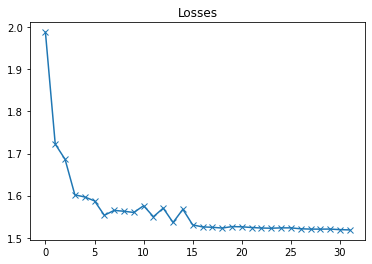

In [23]:
plot(losses, 'Losses')

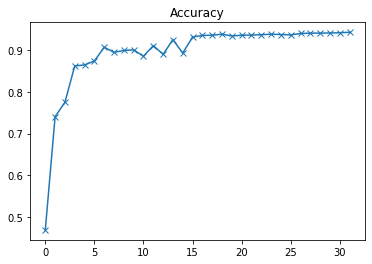

In [24]:
plot(accuracies, 'Accuracy')

## Testing against data outside the dataset

(My recorded voice)

In [25]:
# function to get mel spectogram image
def get_mel(data, sr):
    fig = plt.figure(figsize=[1,1])
    ax = fig.add_subplot(111)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.set_frame_on(False)
    
    # mel spectograms
    S = librosa.feature.melspectrogram(y=data, sr=sr)
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max), x_axis='time', y_axis='mel', fmin=50, fmax=280)
    file  = 'sample.jpg'
    plt.savefig(file, bbox_inches='tight',pad_inches=0)
    plt.close()

    img = Image.open(file)

    transform = transforms.Compose([transforms.ToTensor()])

    img = transform(np.asarray(img))
    
    # delete unnecessary file, not needed anymore.
    os.remove('sample.jpg')
    
    return img

# function to get output from audio sample
def get_prediction(model, img):  
    # adding dimension corresponding to batch (3, 54, 55) --> (1, 3, 54, 55)
    output = model(img.unsqueeze(0)).detach().numpy()
    num = np.argmax(output) 

    return output, num

In [26]:
# List of user recorded samples
user_samples = ['user_sample_1.wav', 'user_sample_2.wav', 'user_sample_3.wav', 'user_sample_5.wav']
sample_id = random.randint(0,3)    # select random sample

data, sr = librosa.load('melimages/'+user_samples[sample_id])
output, prediction = get_prediction(model, get_mel(data, sr))
print("Predicted {} with probability {}.".format(prediction, output[0][prediction]))

ipd.Audio(data = data, rate = sr)

Predicted 5 with probability 0.9997699856758118.


/opt/tljh/user/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/opt/tljh/user/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


## deepC

In [27]:
meldset[0][0].shape

torch.Size([3, 54, 55])

In [28]:
dummy = meldset[0][0].unsqueeze(0)
torch.onnx.export(model, dummy, 'spokendigit_cnn_mel.onnx')

!deepCC spokendigit_cnn_mel.onnx

reading onnx model from file  spokendigit_cnn_mel.onnx
Model info:
  ir_vesion :  4 
  doc       : 
running DNNC graph sanity check ... passed.
Writing C++ file  spokendigit_cnn_mel_deepC/spokendigit_cnn_mel.cpp
INFO (ONNX): model files are ready in dir spokendigit_cnn_mel_deepC
g++ -std=c++11 -O3 -I. -I/opt/tljh/user/lib/python3.7/site-packages/deepC-0.13-py3.7-linux-x86_64.egg/deepC/include -isystem /opt/tljh/user/lib/python3.7/site-packages/deepC-0.13-py3.7-linux-x86_64.egg/deepC/packages/eigen-eigen-323c052e1731 spokendigit_cnn_mel_deepC/spokendigit_cnn_mel.cpp -o spokendigit_cnn_mel_deepC/spokendigit_cnn_mel.exe
Model executable  spokendigit_cnn_mel_deepC/spokendigit_cnn_mel.exe


In [29]:
# List of user recorded samples
user_samples = ['user_sample_1.wav', 'user_sample_2.wav', 'user_sample_3.wav', 'user_sample_5.wav']
sample_id = random.randint(0,3)    # select random sample

# write to input file img.data
data, sr = librosa.load('melimages/'+user_samples[sample_id])
img_data = get_mel(data, sr).unsqueeze(0)
np.savetxt('img.data', img_data.flatten())

# pass to .exe file
!spokendigit_cnn_mel_deepC/spokendigit_cnn_mel.exe img.data

# show predicted output
nn_out = np.loadtxt('43.out')
print ("Model predicted the digit ", np.argmax(nn_out))

ipd.Audio(data = data, rate = sr)

reading file img.data.
writing file 43.out.
Model predicted the digit  1
